<a href="https://colab.research.google.com/github/annakaminska9898/data-science-bootcamp/blob/main/analiza_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('http://analityk.edu.pl/wp-content/uploads/2020/02/titanic.csv')
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
#usuwanie niepotrzebnych kolumn

df = df.drop(['sibsp','ticket','fare','boat','body','cabin'], axis=1) #usuwamy kolumny które nas nie interesuja

In [9]:
df.head()

,pclass,survived,name,sex,age,parch,embarked,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,2,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,2,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,2,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,2,S,"Montreal, PQ / Chesterville, ON"


In [11]:
#czy są zduplikowane rekordy?

df[df.duplicated()==True]

,pclass,survived,name,sex,age,parch,embarked,home_dest


In [12]:
#brakujące dane

df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
parch          0
embarked       2
home_dest    564
dtype: int64

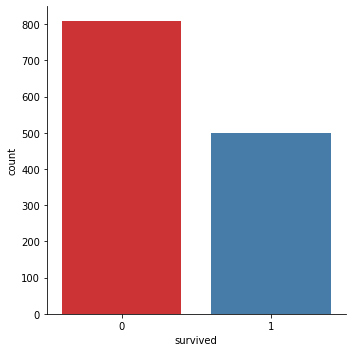

In [13]:
#ile osób przeżyło, a ile zginęło?

sns.set_palette("Set1")
sns.catplot(data=df,
           x='survived',
           kind='count')
plt.show()



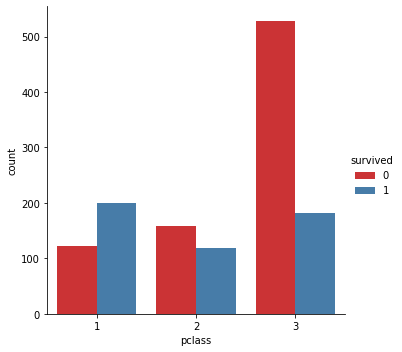

In [14]:
#czy rodzaj klasy podróżujących miał wpływ na przeżycie?

sns.catplot(data=df,
           x='pclass',
           kind = 'count',
           hue= 'survived')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


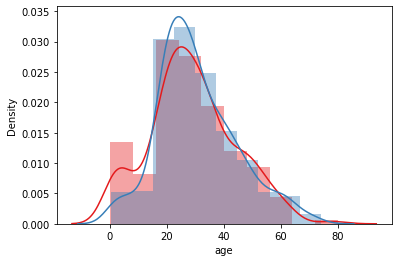

In [15]:
#czy wiek osoby miał wpływ na przeżycie

sns.distplot(df[df['age'].notnull() & (df['survived']==1)]['age'], 
             kde_kws={"label": "Survived"}, 
             bins=10)
sns.distplot(df[df['age'].notnull() & (df['survived']==0)]['age'], 
             kde_kws={"label": "Not Survived"}, 
             bins=10)
plt.show()

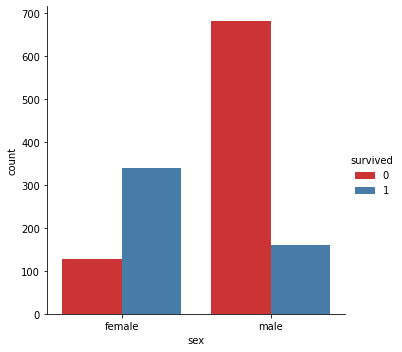

In [16]:
#przeżycie w zależności od wieku

sns.catplot(data=df,
           x = 'sex',
           hue = 'survived',
           kind='count')
plt.show()